In [1]:
import pandas as pd
import scipy as sc
import numpy as np
from scipy.stats import mode
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

In [2]:
agency_df = pd.read_csv('AgencyData_Without2015.csv')

In [3]:
agency_df.describe()

,AGENCY_ID,PRIMARY_AGENCY_ID,STAT_PROFILE_DATE_YEAR,RETENTION_POLY_QTY,POLY_INFORCE_QTY,PREV_POLY_INFORCE_QTY,NB_WRTN_PREM_AMT,WRTN_PREM_AMT,PREV_WRTN_PREM_AMT,PRD_ERND_PREM_AMT,...,PL_BOUND_CT_ELINKS,PL_QUO_CT_ELINKS,PL_BOUND_CT_PLRANK,PL_QUO_CT_PLRANK,PL_BOUND_CT_eQTte,PL_QUO_CT_eQTte,PL_BOUND_CT_APPLIED,PL_QUO_CT_APPLIED,PL_BOUND_CT_TRANSACTNOW,PL_QUO_CT_TRANSACTNOW
count,192347.000000,192347.000000,192347.000000,192347.00000,192347.000000,192347.000000,192347.000000,1.923470e+05,1.923470e+05,1.923470e+05,...,192347.000000,192347.000000,192347.000000,192347.000000,192347.000000,192347.000000,192347.000000,192347.000000,192347.000000,192347.000000
mean,4978.213604,22600.895735,2009.667258,170.30721,188.527838,6833.655810,2372.716566,2.081519e+04,2.731501e+04,2.064040e+04,...,27454.629815,27495.623087,27458.233656,27565.119976,27489.765949,27616.812864,27454.552273,27460.027695,27453.774995,27453.928192
std,2930.136861,37040.566570,2.839440,752.36674,810.851902,24858.434348,10348.132792,6.927539e+04,7.280141e+04,6.921617e+04,...,44627.364166,44602.940289,44625.151893,44560.928091,44605.786161,44528.190010,44627.411745,44624.061688,44627.889541,44627.795329
min,3.000000,3.000000,2005.000000,0.00000,0.000000,0.000000,0.000000,-2.027776e+05,-1.192047e+05,-1.643490e+05,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2364.000000,2805.000000,2007.000000,0.00000,0.000000,0.000000,0.000000,5.200000e+01,1.990000e+02,9.753000e+01,...,0.000000,0.000000,0.000000,0.000000,12.000000,66.000000,0.000000,0.000000,0.000000,0.000000
50%,4976.000000,6137.000000,2010.000000,0.00000,0.000000,0.000000,0.000000,1.276000e+03,1.975030e+03,1.291750e+03,...,0.000000,0.000000,0.000000,0.000000,52.000000,260.000000,0.000000,0.000000,0.000000,0.000000
75%,7589.000000,9360.000000,2012.000000,24.00000,36.000000,79.000000,542.870000,8.920620e+03,1.594701e+04,8.769655e+03,...,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
max,9998.000000,99999.000000,2014.000000,21979.00000,22968.000000,99999.000000,556930.220000,1.715742e+06,1.904570e+06,1.780498e+06,...,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000


In [4]:
agency_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192347 entries, 0 to 192346
Data columns (total 49 columns):
AGENCY_ID                    192347 non-null int64
PRIMARY_AGENCY_ID            192347 non-null int64
PROD_ABBR                    192347 non-null object
PROD_LINE                    192347 non-null object
STATE_ABBR                   192347 non-null object
STAT_PROFILE_DATE_YEAR       192347 non-null int64
RETENTION_POLY_QTY           192347 non-null int64
POLY_INFORCE_QTY             192347 non-null int64
PREV_POLY_INFORCE_QTY        192347 non-null int64
NB_WRTN_PREM_AMT             192347 non-null float64
WRTN_PREM_AMT                192347 non-null float64
PREV_WRTN_PREM_AMT           192347 non-null float64
PRD_ERND_PREM_AMT            192347 non-null float64
PRD_INCRD_LOSSES_AMT         192347 non-null float64
MONTHS                       192347 non-null int64
RETENTION_RATIO              192347 non-null float64
LOSS_RATIO                   192347 non-null float64
LOSS_

In [5]:
agency_df.apply(lambda x: sum(x.isnull()))

AGENCY_ID                    0
PRIMARY_AGENCY_ID            0
PROD_ABBR                    0
PROD_LINE                    0
STATE_ABBR                   0
STAT_PROFILE_DATE_YEAR       0
RETENTION_POLY_QTY           0
POLY_INFORCE_QTY             0
PREV_POLY_INFORCE_QTY        0
NB_WRTN_PREM_AMT             0
WRTN_PREM_AMT                0
PREV_WRTN_PREM_AMT           0
PRD_ERND_PREM_AMT            0
PRD_INCRD_LOSSES_AMT         0
MONTHS                       0
RETENTION_RATIO              0
LOSS_RATIO                   0
LOSS_RATIO_3YR               0
GROWTH_RATE_3YR              0
AGENCY_APPOINTMENT_YEAR      0
ACTIVE_PRODUCERS             0
MAX_AGE                      0
MIN_AGE                      0
VENDOR_IND                   0
VENDOR                       0
PL_START_YEAR                0
PL_END_YEAR                  0
COMMISIONS_START_YEAR        0
COMMISIONS_END_YEAR          0
CL_START_YEAR                0
CL_END_YEAR                  0
ACTIVITY_NOTES_START_YEAR    0
ACTIVITY

In [42]:
agency_df.apply(lambda x: sum(x == 0))

AGENCY_ID                         0
PRIMARY_AGENCY_ID                 0
PROD_ABBR                         0
PROD_LINE                         0
STATE_ABBR                        0
STAT_PROFILE_DATE_YEAR            0
RETENTION_POLY_QTY           118601
POLY_INFORCE_QTY             113203
PREV_POLY_INFORCE_QTY        101391
NB_WRTN_PREM_AMT             121630
WRTN_PREM_AMT                 40373
PREV_WRTN_PREM_AMT            30818
PRD_ERND_PREM_AMT             36769
PRD_INCRD_LOSSES_AMT         140506
MONTHS                            0
RETENTION_RATIO                5420
LOSS_RATIO                    98154
LOSS_RATIO_3YR                 7819
GROWTH_RATE_3YR                  24
AGENCY_APPOINTMENT_YEAR           0
ACTIVE_PRODUCERS                  0
MAX_AGE                           0
MIN_AGE                           0
VENDOR_IND                        0
VENDOR                            0
PL_START_YEAR                     0
PL_END_YEAR                       0
COMMISIONS_START_YEAR       

In [320]:
agency_df.apply(lambda x: sum(x == 99999))

AGENCY_ID                       0
PRIMARY_AGENCY_ID           35695
PROD_ABBR                       0
PROD_LINE                       0
STATE_ABBR                      0
STAT_PROFILE_DATE_YEAR          0
RETENTION_POLY_QTY              0
POLY_INFORCE_QTY                0
PREV_POLY_INFORCE_QTY       12770
NB_WRTN_PREM_AMT                1
WRTN_PREM_AMT                   0
PREV_WRTN_PREM_AMT          12770
PRD_ERND_PREM_AMT               0
PRD_INCRD_LOSSES_AMT            0
MONTHS                          0
RETENTION_RATIO            117107
LOSS_RATIO                  42858
LOSS_RATIO_3YR              28136
GROWTH_RATE_3YR             70086
AGENCY_APPOINTMENT_YEAR         0
ACTIVE_PRODUCERS                0
MAX_AGE                         0
MIN_AGE                         0
VENDOR_IND                      0
VENDOR                          0
PL_START_YEAR               75219
PL_END_YEAR                     0
COMMISIONS_START_YEAR      128915
COMMISIONS_END_YEAR        185433
CL_START_YEAR 

In [323]:
agency_df.columns[agency_df.apply(lambda x: sum(x == 99999) > (0.4*len(agency_df)))]

Index(['RETENTION_RATIO', 'COMMISIONS_START_YEAR', 'COMMISIONS_END_YEAR',
       'CL_START_YEAR', 'CL_END_YEAR', 'ACTIVITY_NOTES_START_YEAR',
       'ACTIVITY_NOTES_END_YEAR', 'CL_BOUND_CT_MDS', 'CL_QUO_CT_MDS',
       'CL_BOUND_CT_SBZ', 'CL_QUO_CT_SBZ', 'CL_BOUND_CT_eQT', 'CL_QUO_CT_eQT'],
      dtype='object')

In [12]:
max_age_mode = agency_df.pivot_table(values='MAX_AGE', columns='STAT_PROFILE_DATE_YEAR',aggfunc=(lambda x:mode(x).mode[0]) )


miss_bool =  (agency_df['MAX_AGE']==99999)
agency_df.loc[miss_bool,'MAX_AGE'] = agency_df.loc[miss_bool,'STAT_PROFILE_DATE_YEAR'].apply(lambda x: max_age_mode[x])

agency_df[agency_df['MAX_AGE']==99999]['MAX_AGE'].count()

0

In [13]:
min_age_mode = agency_df.pivot_table(values='MIN_AGE', columns='STAT_PROFILE_DATE_YEAR',aggfunc=(lambda x:mode(x).mode[0]) )
print (min_age_mode)
miss_bool =  (agency_df['MIN_AGE']==99999)
agency_df.loc[miss_bool,'MIN_AGE'] = agency_df.loc[miss_bool,'STAT_PROFILE_DATE_YEAR'].apply(lambda x: min_age_mode[x])
agency_df[agency_df['MIN_AGE']==99999]['MIN_AGE'].count()

STAT_PROFILE_DATE_YEAR
2005    31
2006    31
2007    31
2008    31
2009    31
2010    31
2011    31
2012    31
2013    31
2014    31
Name: MIN_AGE, dtype: int64


0

In [14]:
apt_year_mode = agency_df.pivot_table(values='AGENCY_APPOINTMENT_YEAR', columns='STAT_PROFILE_DATE_YEAR',aggfunc=(lambda x:mode(x).mode[0]) )
#print (apt_year_mode)
miss_bool =  (agency_df['AGENCY_APPOINTMENT_YEAR']==99999)
miss_bool

agency_df.loc[miss_bool,'AGENCY_APPOINTMENT_YEAR'] = agency_df.loc[miss_bool,'STAT_PROFILE_DATE_YEAR'].apply(lambda x: apt_year_mode[x])
agency_df[agency_df['AGENCY_APPOINTMENT_YEAR']==99999]['AGENCY_APPOINTMENT_YEAR'].count()

0

In [15]:
active_producer_mode = agency_df.pivot_table(values='ACTIVE_PRODUCERS', columns='STAT_PROFILE_DATE_YEAR',aggfunc=(lambda x:mode(x).mode[0]) )
#print (apt_year_mode)
miss_bool =  (agency_df['ACTIVE_PRODUCERS']==99999)
agency_df.loc[miss_bool,'ACTIVE_PRODUCERS'] = agency_df.loc[miss_bool,'STAT_PROFILE_DATE_YEAR'].apply(lambda x: active_producer_mode[x])
agency_df[agency_df['ACTIVE_PRODUCERS']==99999]['ACTIVE_PRODUCERS'].count()


0

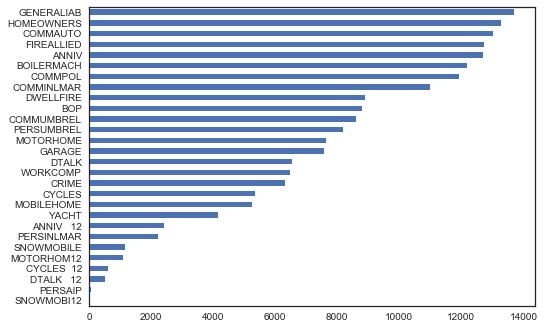

In [ ]:
agency_df['PROD_ABBR'].value_counts().sort_values().plot.barh()

In [ ]:
agency_df.hist(figsize=(30,30),bins=100 , layout=(9,5))

In [10]:
grouped_Year_data = agency_df.groupby(['STAT_PROFILE_DATE_YEAR'])

In [11]:
analysis_column = ['RETENTION_POLY_QTY' , 'POLY_INFORCE_QTY' , 'PREV_POLY_INFORCE_QTY' , 'NB_WRTN_PREM_AMT' , 'WRTN_PREM_AMT' , 'PREV_WRTN_PREM_AMT','PRD_ERND_PREM_AMT' ,
                   'PRD_INCRD_LOSSES_AMT' , 'LOSS_RATIO' , 'RETENTION_RATIO' , 'LOSS_RATIO_3YR' , 'GROWTH_RATE_3YR']

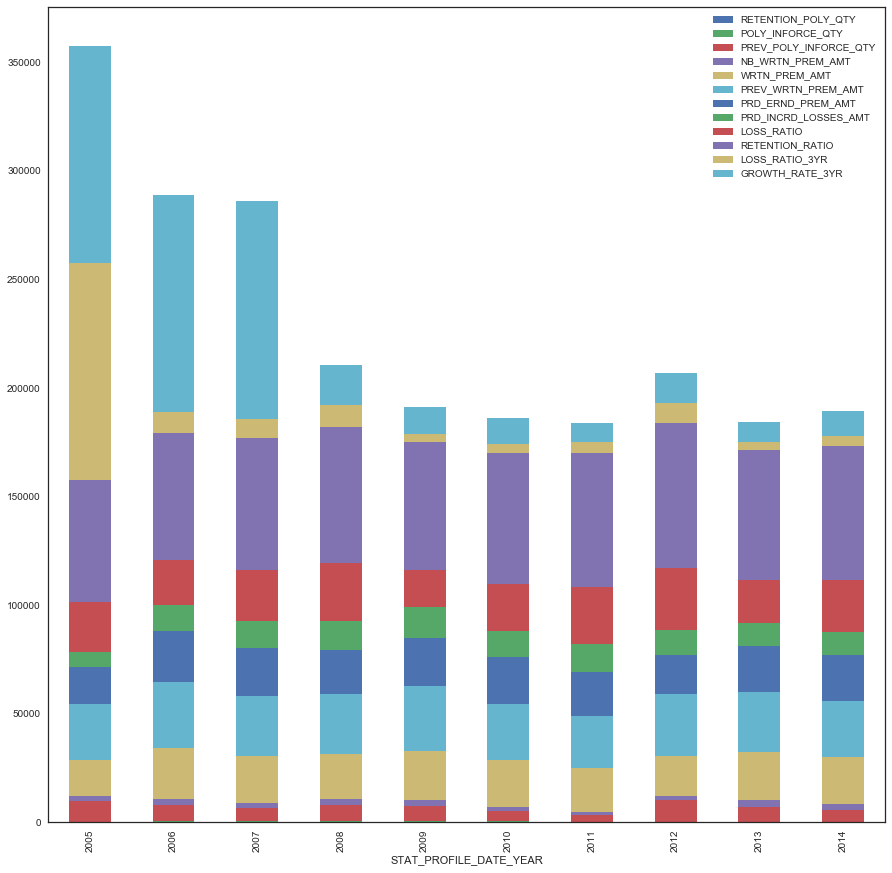

In [103]:
grouped_Year_data[analysis_column].mean().plot.bar(figsize=(15,15) , stacked=True)

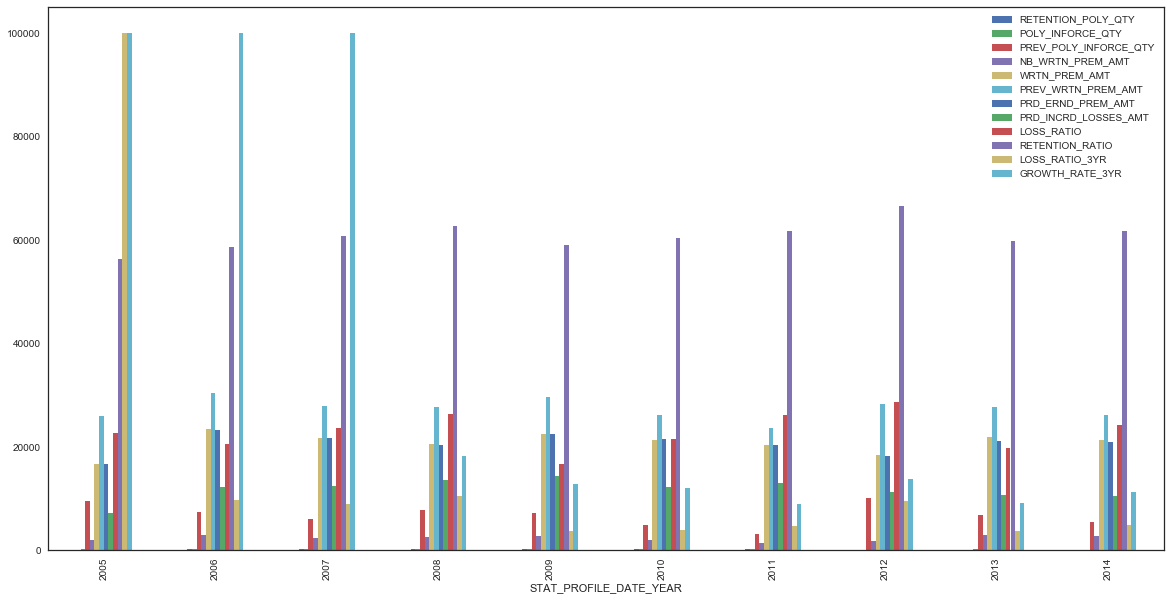

In [102]:
grouped_Year_data[analysis_column].mean().plot.bar(figsize=(20,10) )

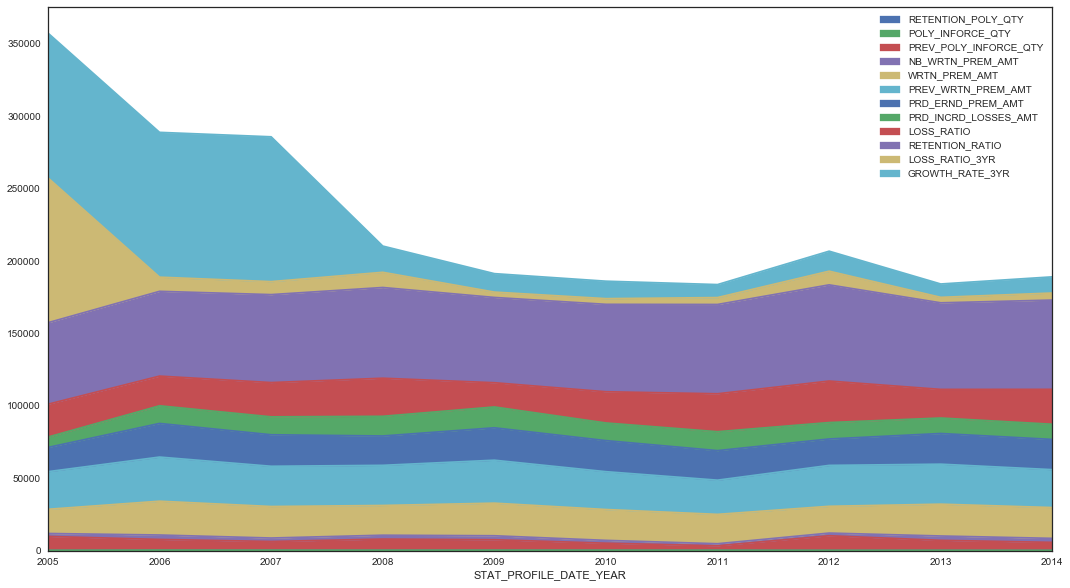

In [101]:
grouped_Year_data[analysis_column].mean().plot.area(figsize=(18,10))

In [12]:
agency_not_zero_df = agency_df.loc[:, (agency_df != 0).all(axis=0)]

In [13]:
agency_not_zero_df.shape , agency_df.shape

((192347, 21), (192347, 49))

agency_not_zero_df.describe()

checking null value

In [81]:
agency_not_zero_df.apply(lambda x: sum(x == 99999))

AGENCY_ID                         0
PRIMARY_AGENCY_ID             35695
PROD_ABBR                         0
PROD_LINE                         0
STATE_ABBR                        0
STAT_PROFILE_DATE_YEAR            0
MONTHS                            0
AGENCY_APPOINTMENT_YEAR           0
ACTIVE_PRODUCERS                  0
MAX_AGE                           0
MIN_AGE                           0
VENDOR_IND                        0
VENDOR                            0
PL_START_YEAR                 75219
PL_END_YEAR                  188605
COMMISIONS_START_YEAR        128915
COMMISIONS_END_YEAR          185433
CL_START_YEAR                117397
CL_END_YEAR                  184698
ACTIVITY_NOTES_START_YEAR    155128
ACTIVITY_NOTES_END_YEAR      188680
dtype: int64

In [16]:
agency_not_zero_df['AGENCY_APPOINTMENT_YEAR' ].mode()

0    1982
dtype: int64

In [15]:
agency_not_zero_df['POLY_INFORCE_QTY'] = agency_df['POLY_INFORCE_QTY']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [83]:
agency_not_zero_df.shape

(192347, 22)

In [92]:
agency_df[analysis_column].head()

,RETENTION_POLY_QTY,POLY_INFORCE_QTY,PREV_POLY_INFORCE_QTY,NB_WRTN_PREM_AMT,WRTN_PREM_AMT,PREV_WRTN_PREM_AMT,PRD_ERND_PREM_AMT,PRD_INCRD_LOSSES_AMT
0,0,0,0,40.0,3074.63,149.00,3005.77,0.0
1,0,0,0,151.0,6562.28,5438.55,6433.44,0.0
2,0,0,0,40.0,6205.11,6562.28,6357.09,0.0
3,0,0,0,69.0,5159.89,6205.11,5315.01,0.0
4,0,0,0,28.0,4527.71,5159.89,4706.47,0.0


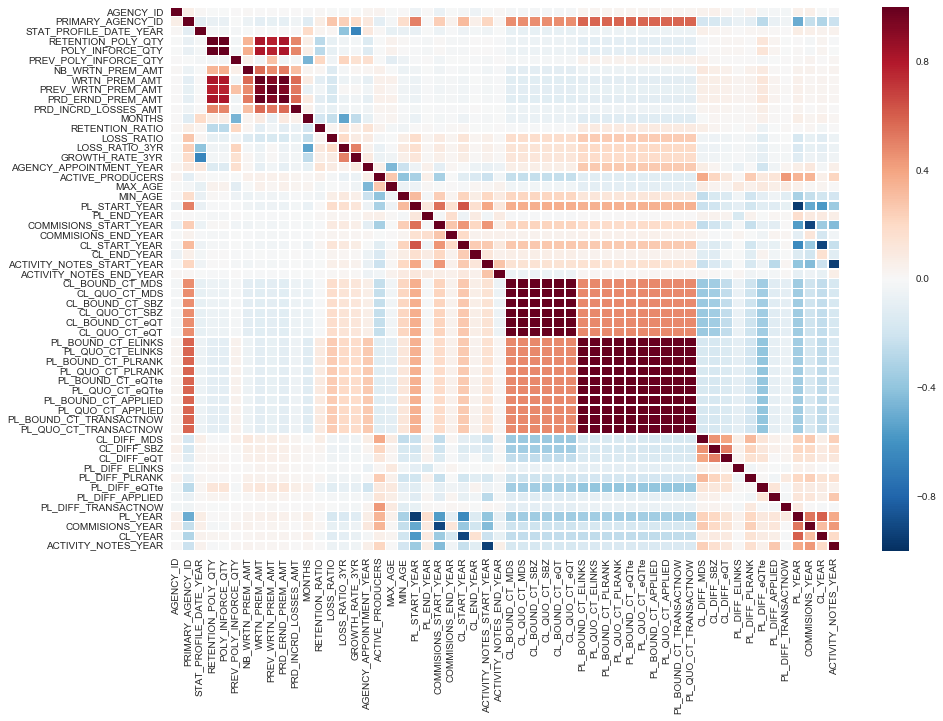

In [50]:
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(agency_df.corr(),linewidths=.5, ax=ax);

In [107]:
train_agency_inforce_qty_df['Agency_Age']=2017 - train_agency_inforce_qty_df['AGENCY_APPOINTMENT_YEAR']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [96]:
train_agency_inforce_qty_df[['MAX_AGE' , 'MIN_AGE' , 'ACTIVE_PRODUCERS' ,'POLY_INFORCE_QTY' , 'Agency_Age']].corr()

,MAX_AGE,MIN_AGE,ACTIVE_PRODUCERS,POLY_INFORCE_QTY,AGENCY_APPOINTMENT_YEAR
MAX_AGE,1.000000,-0.079573,0.254538,0.065652,-0.441148
MIN_AGE,-0.079573,1.000000,-0.410392,0.001090,-0.210352
ACTIVE_PRODUCERS,0.254538,-0.410392,1.000000,0.010117,0.080872
POLY_INFORCE_QTY,0.065652,0.001090,0.010117,1.000000,-0.158407
AGENCY_APPOINTMENT_YEAR,-0.441148,-0.210352,0.080872,-0.158407,1.000000


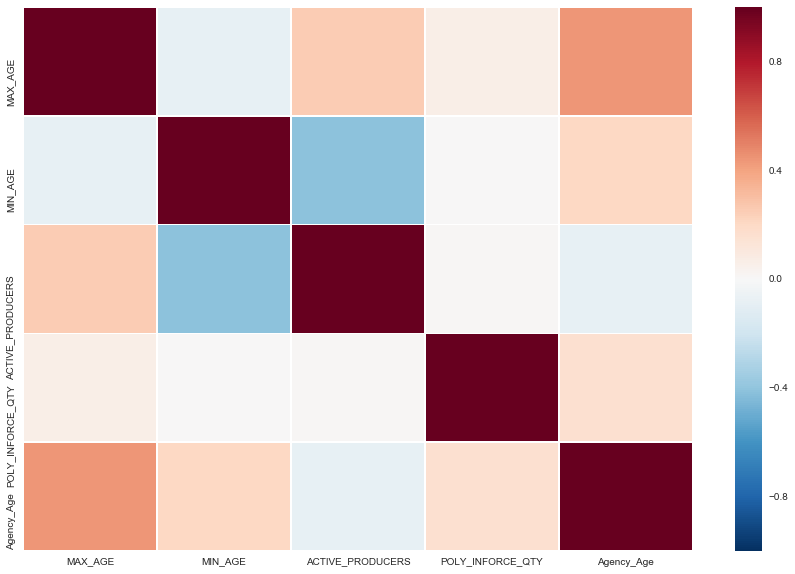

In [108]:
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(train_agency_inforce_qty_df[['MAX_AGE' , 'MIN_AGE' , 'ACTIVE_PRODUCERS' ,'POLY_INFORCE_QTY' , 'Agency_Age']].corr(),linewidths=.5, ax=ax);

In [134]:
agency_df['Agency_Age']=2014 - agency_df['AGENCY_APPOINTMENT_YEAR']

In [135]:
analysis_column_all = analysis_column + ['MAX_AGE' , 'MIN_AGE' , 'ACTIVE_PRODUCERS','STATE_ABBR','Agency_Age' ]

In [114]:
agency_df[analysis_column_all].corr()

,RETENTION_POLY_QTY,POLY_INFORCE_QTY,PREV_POLY_INFORCE_QTY,NB_WRTN_PREM_AMT,WRTN_PREM_AMT,PREV_WRTN_PREM_AMT,PRD_ERND_PREM_AMT,PRD_INCRD_LOSSES_AMT,LOSS_RATIO,RETENTION_RATIO,LOSS_RATIO_3YR,GROWTH_RATE_3YR,MAX_AGE,MIN_AGE,ACTIVE_PRODUCERS
RETENTION_POLY_QTY,1.000000,0.996415,-0.026197,0.339194,0.814894,0.775188,0.820987,0.490538,-0.083304,-0.268813,-0.045017,-0.025688,0.045441,0.008991,-0.007202
POLY_INFORCE_QTY,0.996415,1.000000,-0.023596,0.365952,0.810437,0.765999,0.814647,0.489206,-0.083562,-0.270850,-0.043932,-0.021377,0.042839,0.006073,-0.005647
PREV_POLY_INFORCE_QTY,-0.026197,-0.023596,1.000000,0.057391,-0.035097,0.292804,-0.042872,-0.019828,-0.040662,0.204629,0.225321,0.153904,-0.101731,-0.053145,-0.002777
NB_WRTN_PREM_AMT,0.339194,0.365952,0.057391,1.000000,0.566536,0.469785,0.522304,0.303190,-0.125071,0.021188,-0.015821,0.017653,-0.005140,-0.060932,0.054102
WRTN_PREM_AMT,0.814894,0.810437,-0.035097,0.566536,1.000000,0.926852,0.995996,0.563549,-0.166246,-0.098794,-0.060981,-0.040216,0.049587,-0.034277,0.052855
PREV_WRTN_PREM_AMT,0.775188,0.765999,0.292804,0.469785,0.926852,1.000000,0.933133,0.531074,-0.163606,-0.038120,0.015152,0.011506,0.017664,-0.045664,0.049247
PRD_ERND_PREM_AMT,0.820987,0.814647,-0.042872,0.522304,0.995996,0.933133,1.000000,0.566056,-0.163515,-0.104566,-0.062447,-0.041228,0.051781,-0.032322,0.052837
PRD_INCRD_LOSSES_AMT,0.490538,0.489206,-0.019828,0.303190,0.563549,0.531074,0.566056,1.000000,-0.083266,-0.069990,-0.040081,-0.029975,0.023481,-0.014647,0.024329
LOSS_RATIO,-0.083304,-0.083562,-0.040662,-0.125071,-0.166246,-0.163606,-0.163515,-0.083266,1.000000,0.024663,0.188418,0.084318,-0.006441,0.062856,-0.017865
RETENTION_RATIO,-0.268813,-0.270850,0.204629,0.021188,-0.098794,-0.038120,-0.104566,-0.069990,0.024663,1.000000,0.105049,0.061416,-0.031128,-0.039361,0.042070


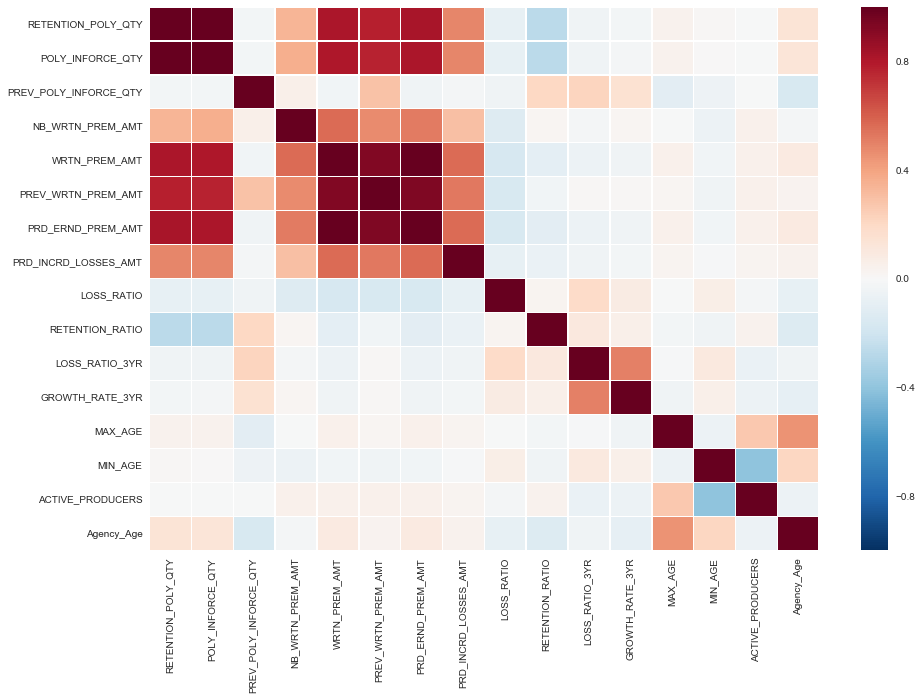

In [136]:
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(agency_df[analysis_column_all].corr(),linewidths=.5, ax=ax);

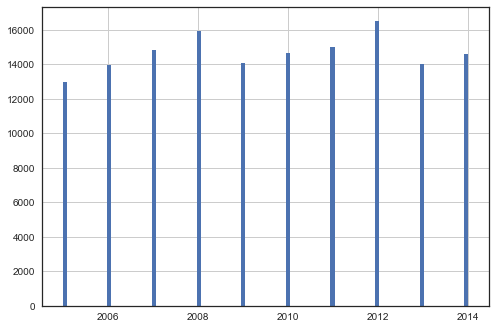

In [139]:
agency_df[(agency_df['CL_BOUND_CT_MDS']== 0 ) | (agency_df['CL_BOUND_CT_MDS']== 99999 )]['STAT_PROFILE_DATE_YEAR'].hist(bins=100)

In [4]:
agency_df['CL_DIFF_MDS'] = agency_df['CL_QUO_CT_MDS']-agency_df['CL_BOUND_CT_MDS']
agency_df['CL_DIFF_SBZ'] = agency_df['CL_QUO_CT_SBZ']-agency_df['CL_BOUND_CT_SBZ']
agency_df['CL_DIFF_eQT'] = agency_df['CL_QUO_CT_eQT']-agency_df['CL_BOUND_CT_eQT']
agency_df['PL_DIFF_ELINKS'] = agency_df['PL_QUO_CT_ELINKS']-agency_df['PL_BOUND_CT_ELINKS']
agency_df['PL_DIFF_PLRANK'] = agency_df['PL_QUO_CT_PLRANK']-agency_df['PL_BOUND_CT_PLRANK']
agency_df['PL_DIFF_eQTte'] = agency_df['PL_QUO_CT_eQTte']-agency_df['PL_BOUND_CT_eQTte']
agency_df['PL_DIFF_APPLIED'] = agency_df['PL_QUO_CT_APPLIED']-agency_df['PL_BOUND_CT_APPLIED']
agency_df['PL_DIFF_TRANSACTNOW'] = agency_df['PL_QUO_CT_TRANSACTNOW']-agency_df['PL_BOUND_CT_TRANSACTNOW']


In [5]:
agency_df['PL_YEAR'] = agency_df['PL_END_YEAR']-agency_df['PL_START_YEAR']
agency_df['COMMISIONS_YEAR'] = agency_df['COMMISIONS_END_YEAR']-agency_df['COMMISIONS_START_YEAR']
agency_df['CL_YEAR'] = agency_df['CL_END_YEAR']-agency_df['CL_START_YEAR']
agency_df['ACTIVITY_NOTES_YEAR'] = agency_df['ACTIVITY_NOTES_END_YEAR']-agency_df['ACTIVITY_NOTES_START_YEAR']


In [31]:
agency_df[(agency_df['CL_DIFF_MDS'] == 0) & (agency_df['CL_DIFF_SBZ'] == 0) & (agency_df['CL_DIFF_eQT'] == 0)]['AGENCY_ID'].count()

115517

In [32]:
agency_df[(agency_df['CL_DIFF_MDS'] != 0) & (agency_df['CL_DIFF_SBZ'] != 0) & (agency_df['CL_DIFF_eQT'] != 0)]['AGENCY_ID'].count()

16000

In [35]:
grouped_year_agency =  agency_df.groupby(['STAT_PROFILE_DATE_YEAR','AGENCY_ID'])

In [36]:
grouped_year_agency.count()

PRIMARY_AGENCY_ID  PROD_ABBR  PROD_LINE  \
STAT_PROFILE_DATE_YEAR AGENCY_ID                                            
2005                   3                         44         44         44   
                       11                        16         16         16   
                       16                        23         23         23   
                       32                        21         21         21   
                       36                        13         13         13   
                       37                         3          3          3   
                       46                        20         20         20   
                       87                        19         19         19   
                       93                         1          1          1   
                       96                        15         15         15   
                       99                         1          1          1   
                       111                       19         19         19   
                       134                        1          1          1   
                       148                       19         19         19   
                       152                       19         19         19   
                       153                        6          6          6   
                       156                       34         34         34   
                       160                        5          5          5   
                       166                       19         19         19   
                       173                       17         17         17   
                       184                       27         27         27   
                       188                       18         18         18   
                       204                       16         16         16   
                       228                        3          3          3   
                       237                       10         10         10   
                       242                       19         19         19   
                       245                       30         30         30   
                       251                       15         15         15   
                       257                        1          1          1   
                       262                       16         16         16   
...                                             ...        ...        ...   
2014                   9725                      38         38         38   
                       9726                      31         31         31   
                       9727                      23         23         23   
                       9733                      52         52         52   
                       9753                      25         25         25   
                       9759                      16         16         16   
                       9761                      34         34         34   
                       9763                       5          5          5   
                       9765                       9          9          9   
                       9780                      19         19         19   
                       9794                       1          1          1   
                       9807                      13         13         13   
                       9830                       1          1          1   
                       9847                       1          1          1   
                       9854                       2          2          2   
                       9864                       2          2          2   
                       9868                       7          7          7   
                       9877                      10         10         10   
                       9891                      20         20         20   
                       9893   

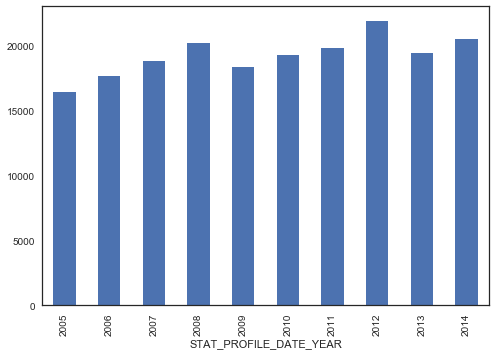

In [41]:
grouped_Year_data['AGENCY_ID'].count().plot.bar()

In [47]:
column_required  = ['AGENCY_ID' , 'PROD_ABBR' ,'PROD_LINE' , 'STATE_ABBR' , 'STAT_PROFILE_DATE_YEAR' , 'POLY_INFORCE_QTY' ,'PREV_POLY_INFORCE_QTY',
                    'NB_WRTN_PREM_AMT' ,
          'WRTN_PREM_AMT' , 'PREV_WRTN_PREM_AMT' , 'PRD_ERND_PREM_AMT' , 'PRD_INCRD_LOSSES_AMT' , 'RETENTION_RATIO' ,
          'LOSS_RATIO' , 'LOSS_RATIO_3YR' , 'GROWTH_RATE_3YR' , 'MAX_AGE' , 'MIN_AGE' , 'PL_YEAR' , 'COMMISIONS_YEAR' , 
          'CL_YEAR' , 'ACTIVITY_NOTES_YEAR' , 'CL_DIFF_MDS' , 'CL_DIFF_SBZ' , 'CL_DIFF_eQT' , 'PL_DIFF_ELINKS' , 'PL_DIFF_PLRANK',
         'PL_DIFF_eQTte' , 'PL_DIFF_APPLIED' , 'PL_DIFF_TRANSACTNOW' ]

#subset_agency_inforce_data = agency_df[column_required]

In [7]:
subset_agency_inforce_data.groupby(['PROD_LINE']).size()

PROD_LINE
CL    112255
PL     80092
dtype: int64

In [65]:
train_agency_df =  subset_agency_inforce_data[subset_agency_inforce_data['WRTN_PREM_AMT'] != 0 ]

test_agency_df =  subset_agency_inforce_data[subset_agency_inforce_data['WRTN_PREM_AMT'] == 0 ]

train_agency_df.shape , test_agency_df.shape , subset_agency_inforce_data.shape

((151974, 28), (40373, 28), (192347, 28))

In [72]:
print(len(subset_agency_inforce_data[subset_agency_inforce_data['POLY_INFORCE_QTY'] != 0 ].groupby(['AGENCY_ID'])['AGENCY_ID']))

print(len(subset_agency_inforce_data[subset_agency_inforce_data['PREV_POLY_INFORCE_QTY'] != 0 ].groupby(['AGENCY_ID'])
          ['AGENCY_ID']))

print(len(subset_agency_inforce_data[subset_agency_inforce_data['NB_WRTN_PREM_AMT'] != 0 ].groupby(['AGENCY_ID'])['AGENCY_ID']))

print(len(subset_agency_inforce_data[subset_agency_inforce_data['WRTN_PREM_AMT'] != 0 ].groupby(['AGENCY_ID'])['AGENCY_ID']))

print(len(subset_agency_inforce_data[subset_agency_inforce_data['PREV_WRTN_PREM_AMT'] != 0 ].groupby(['AGENCY_ID'])['AGENCY_ID']))

print(len(subset_agency_inforce_data[subset_agency_inforce_data['PRD_ERND_PREM_AMT'] != 0 ].groupby(['AGENCY_ID'])['AGENCY_ID']))

print(len(subset_agency_inforce_data[subset_agency_inforce_data['PRD_INCRD_LOSSES_AMT'] != 0 ].groupby(['AGENCY_ID'])['AGENCY_ID']))

1305
1439
1266
1357
1448
1381
1405


In [74]:
count_not_null_agency = subset_agency_inforce_data[(subset_agency_inforce_data['POLY_INFORCE_QTY'] != 0) &
                          (subset_agency_inforce_data['PREV_POLY_INFORCE_QTY'] != 0) &
                          (subset_agency_inforce_data['NB_WRTN_PREM_AMT'] != 0) &
                          (subset_agency_inforce_data['WRTN_PREM_AMT'] != 0) &
                          (subset_agency_inforce_data['PREV_WRTN_PREM_AMT'] != 0) &
                          (subset_agency_inforce_data['PRD_ERND_PREM_AMT'] != 0) &
                          (subset_agency_inforce_data['PRD_INCRD_LOSSES_AMT'] != 0)]

print(len(count_not_null_agency.groupby(['AGENCY_ID'])['AGENCY_ID']))

1010


In [75]:
count_not_null_agency.shape

(19391, 29)

In [67]:
len(test_agency_df.groupby(['AGENCY_ID'])['AGENCY_ID'])

1572

In [64]:
len(subset_agency_inforce_data.groupby(['AGENCY_ID'])['AGENCY_ID'])

1600

In [112]:
grouped_prod_line  = subset_agency_inforce_data[['PROD_ABBR' , 'PROD_LINE']].groupby(['PROD_LINE' , 'PROD_ABBR'])

In [113]:
grouped_prod_line.size()

PROD_LINE  PROD_ABBR 
CL         BOILERMACH    12170
           BOP            8782
           COMMAUTO      13018
           COMMINLMAR    10997
           COMMPOL       11915
           COMMUMBREL     8591
           CRIME          6319
           FIREALLIED    12715
           GARAGE         7585
           GENERALIAB    13698
           WORKCOMP       6465
PL         ANNIV         12695
           ANNIV   12     2407
           CYCLES         5363
           CYCLES  12      607
           DTALK          6541
           DTALK   12      505
           DWELLFIRE      8889
           HOMEOWNERS    13277
           MOBILEHOME     5245
           MOTORHOM12     1113
           MOTORHOME      7648
           PERSAIP          57
           PERSINLMAR     2230
           PERSUMBREL     8170
           SNOWMOBI12       39
           SNOWMOBILE     1159
           YACHT          4147
dtype: int64

In [116]:
agency_df.groupby(['MONTHS']).size()

MONTHS
1       1042
2       7785
3       1031
4        939
5       1063
6        983
7       1295
8      16791
9       1046
10      1258
11      1020
12    158094
dtype: int64

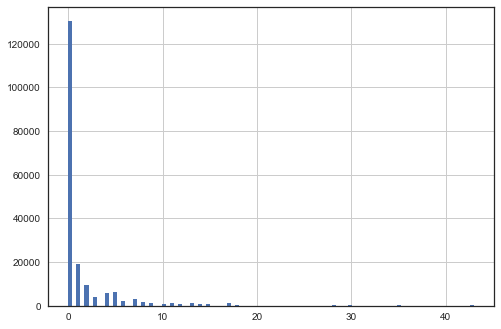

In [107]:
subset_agency_inforce_data['CL_DIFF_MDS'].hist(normed=False,bins=100)

In [123]:
agency_df[agency_df['CL_BOUND_CT_MDS']!= 0].groupby(['STAT_PROFILE_DATE_YEAR' , 'MONTHS']).size()

STAT_PROFILE_DATE_YEAR  MONTHS
2005                    1            91
                        2            83
                        3            74
                        4            72
                        5           110
                        6            80
                        7            85
                        8         11161
2006                    1            59
                        2            56
                        3            64
                        4            86
                        5           111
                        6            91
                        7           128
                        8           125
                        9            78
                        10          105
                        11           91
                        12        11830
2007                    1            90
                        2            70
                        3            49
                        4            74
         

In [8]:
pl_subset_agency_df =  subset_agency_inforce_data[subset_agency_inforce_data['PROD_LINE'] == 'PL' ]
cl_subset_agency_df =  subset_agency_inforce_data[subset_agency_inforce_data['PROD_LINE'] == 'CL' ]
pl_subset_agency_df.shape , cl_subset_agency_df.shape , subset_agency_inforce_data.shape

((80092, 30), (112255, 30), (192347, 30))

In [10]:
pl_subset_agency_df[['PL_DIFF_ELINKS' , 'PL_DIFF_PLRANK','PL_DIFF_eQTte' , 'PL_DIFF_APPLIED' , 'PL_DIFF_TRANSACTNOW']].apply(lambda x: sum(x == 0))

PL_DIFF_ELINKS         73748
PL_DIFF_PLRANK         66180
PL_DIFF_eQTte          22298
PL_DIFF_APPLIED        73568
PL_DIFF_TRANSACTNOW    78418
dtype: int64

In [11]:
cl_subset_agency_df[['PL_DIFF_ELINKS' , 'PL_DIFF_PLRANK','PL_DIFF_eQTte' , 'PL_DIFF_APPLIED' , 'PL_DIFF_TRANSACTNOW']].apply(lambda x: sum(x == 0))

PL_DIFF_ELINKS         103192
PL_DIFF_PLRANK          90760
PL_DIFF_eQTte           35384
PL_DIFF_APPLIED        102705
PL_DIFF_TRANSACTNOW    109604
dtype: int64

In [269]:
pl_agency_df =  agency_df[agency_df['PROD_LINE'] == 'PL' ]
cl_agency_df =  agency_df[agency_df['PROD_LINE'] == 'CL' ]

In [261]:
pl_agency_df.apply(lambda x: sum(x == 99999))

AGENCY_ID                      0
PRIMARY_AGENCY_ID          14988
PROD_ABBR                      0
PROD_LINE                      0
STATE_ABBR                     0
STAT_PROFILE_DATE_YEAR         0
RETENTION_POLY_QTY             0
POLY_INFORCE_QTY               0
PREV_POLY_INFORCE_QTY       4685
NB_WRTN_PREM_AMT               0
WRTN_PREM_AMT                  0
PREV_WRTN_PREM_AMT          4685
PRD_ERND_PREM_AMT              0
PRD_INCRD_LOSSES_AMT           0
MONTHS                         0
RETENTION_RATIO            15513
LOSS_RATIO                 12858
LOSS_RATIO_3YR             11320
GROWTH_RATE_3YR            27988
AGENCY_APPOINTMENT_YEAR        0
ACTIVE_PRODUCERS               0
MAX_AGE                        0
MIN_AGE                        0
VENDOR_IND                     0
VENDOR                         0
PL_START_YEAR                  0
PL_END_YEAR                    0
COMMISIONS_START_YEAR      55312
COMMISIONS_END_YEAR        77107
CL_START_YEAR              49351
          

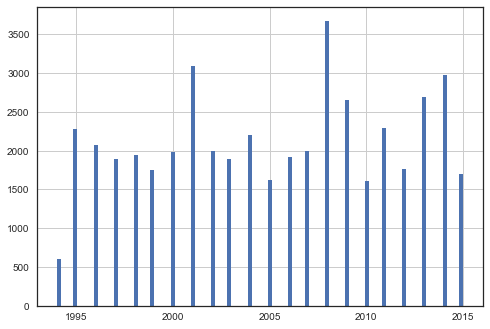

In [106]:
pl_agency_df[(pl_agency_df['PL_START_YEAR'] != 0 ) & (pl_agency_df['PL_START_YEAR'] != 99999)]['PL_START_YEAR'].hist(normed=False,bins=100)

In [33]:
pl_agency_df[(pl_agency_df['PL_START_YEAR'] == 99999 ) & (pl_agency_df['PL_END_YEAR'] == 99999)]['AGENCY_ID'].count()

33487

In [35]:
pl_agency_df[['PL_START_YEAR' , 'MAX_AGE']].corr() 

,PL_START_YEAR,MAX_AGE
PL_START_YEAR,1.000000,-0.045288
MAX_AGE,-0.045288,1.000000


In [39]:
not_missing_start_year  = pl_agency_df[(pl_agency_df['PL_START_YEAR'] != 99999) ]

In [45]:
not_missing_start_year[['PL_START_YEAR' , 'ACTIVE_PRODUCERS']].corr()

,PL_START_YEAR,ACTIVE_PRODUCERS
PL_START_YEAR,1.000000,-0.157121
ACTIVE_PRODUCERS,-0.157121,1.000000


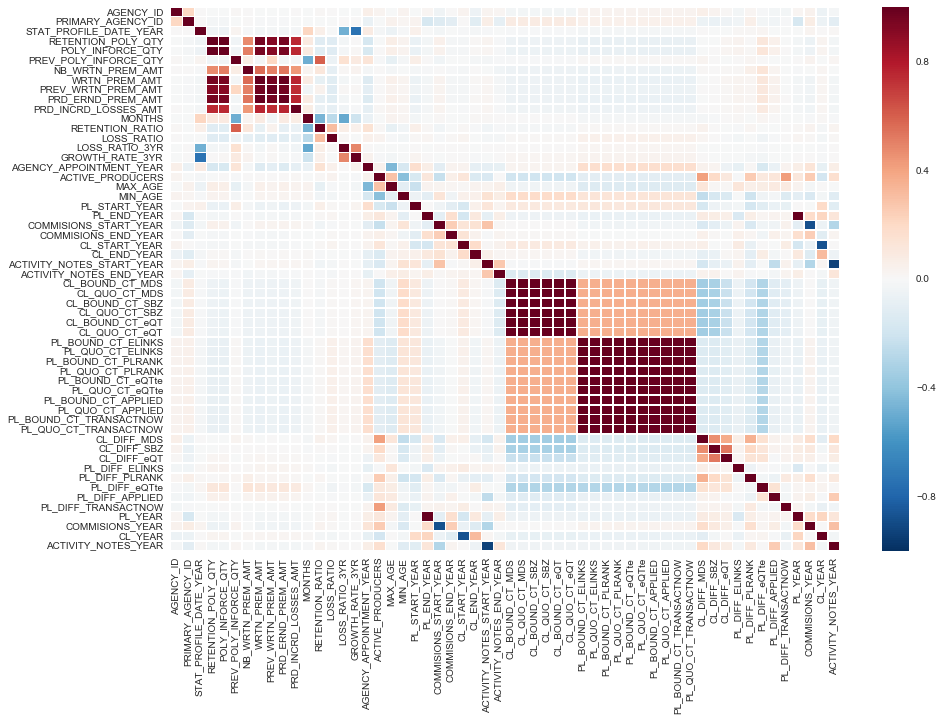

In [49]:
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(not_missing_start_year.corr(),linewidths=.5, ax=ax);

In [235]:
pl_agency_df['PL_START_YEAR'].value_counts()

2008.0    4395
2001.0    3293
2014.0    3172
2009.0    3135
2013.0    2884
2011.0    2690
2004.0    2628
2003.0    2431
2010.0    2361
2002.0    2342
1999.0    2338
2007.0    2322
1995.0    2282
1997.0    2224
1996.0    2147
2000.0    2111
1998.0    2100
2006.0    2044
2012.0    2015
2005.0    1963
2015.0    1702
1994.0     608
Name: PL_START_YEAR, dtype: int64

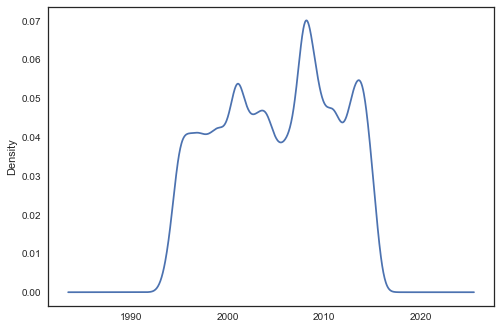

In [234]:
pl_agency_df['PL_START_YEAR' ].plot.kde()

In [270]:
predictor_agency_data = pl_agency_df[[ 'AGENCY_APPOINTMENT_YEAR']][pl_agency_df['PL_START_YEAR'] != 99999]
#reshape_weight_predict = reshape_weight_predict.values.reshape( (14204 , 1) )

predict_agency_data = pl_agency_df[[  'AGENCY_APPOINTMENT_YEAR']][pl_agency_df['PL_START_YEAR'] == 99999]
#reshape_weight_predict = reshape_weight_predict.values.reshape( (14204 , 1) )

In [201]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
#data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['PROD_ABBR']
le = LabelEncoder()
for i in var_mod:
    predictor_agency_data[i] = le.fit_transform(predictor_agency_data[i])
    predict_agency_data[i]  = le.fit_transform(predict_agency_data[i])
predictor_agency_data = pd.get_dummies(predictor_agency_data, columns=['PROD_ABBR'])   
predict_agency_data  = pd.get_dummies(predict_agency_data, columns=['PROD_ABBR'])


In [205]:
predictor_agency_data.shape

(46605, 1)

In [206]:
predict_agency_data.shape

(33487, 1)

In [271]:
miss_value  = pl_agency_df['PL_START_YEAR'] == 99999

In [272]:
target_value  = pl_agency_df['PL_START_YEAR'][pl_agency_df['PL_START_YEAR'] != 99999]

In [273]:
target_value.describe()

count    46605.000000
mean      2005.110267
std          6.134224
min       1994.000000
25%       2000.000000
50%       2005.000000
75%       2010.000000
max       2015.000000
Name: PL_START_YEAR, dtype: float64

In [274]:
target_value_array = target_value.values.reshape( ( 46605 , 1) )

In [275]:
reshape_agency_data_array = predictor_agency_data.values.reshape( (46605 , 1) )

In [276]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=10 , weights='distance')
neigh.fit( reshape_agency_data_array , target_value_array)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='distance')

In [277]:
predicted_value  = np.ceil(neigh.predict(predict_agency_data))

predicted_value_df = pd.DataFrame(predicted_value , columns=[ 'PL_START_YEAR'])


pl_agency_df.loc[miss_value , 'PL_START_YEAR'] = predicted_value_df['PL_START_YEAR']

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [278]:
pl_agency_df['PL_START_YEAR'].describe()

count    53187.000000
mean      2005.178784
std          5.992052
min       1994.000000
25%       2000.000000
50%       2006.000000
75%       2010.000000
max       2015.000000
Name: PL_START_YEAR, dtype: float64

In [223]:
predicted_value_df.values

array([[ 1995.],
       [ 1995.],
       [ 1995.],
       ..., 
       [ 2010.],
       [ 2010.],
       [ 2010.]])

In [253]:
pl_agency_df['PL_END_YEAR'] = pl_agency_df['PL_END_YEAR'].replace(99999 , 2014)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [254]:
pl_agency_df['PL_AGE'] = pl_agency_df['PL_END_YEAR'] - pl_agency_df['PL_START_YEAR']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [255]:
pl_agency_df['PL_AGE'].describe()

count    53187.000000
mean         8.692857
std          5.980292
min         -1.000000
25%          4.000000
50%          8.000000
75%         14.000000
max         20.000000
Name: PL_AGE, dtype: float64

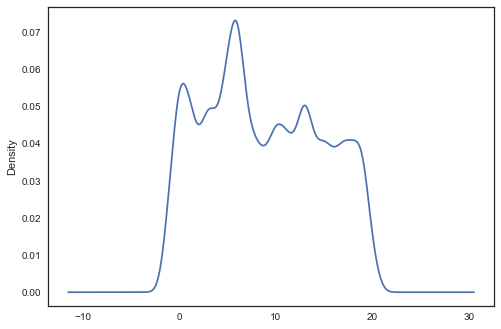

In [257]:
pl_agency_df['PL_AGE'].plot.kde()

In [258]:
pl_agency_df['PL_AGE'].value_counts()

 6.0     4471
 5.0     3483
 0.0     3349
 13.0    3093
 1.0     2884
 3.0     2857
 10.0    2530
 7.0     2454
 4.0     2373
 11.0    2355
 19.0    2282
 15.0    2255
 17.0    2224
 8.0     2159
 18.0    2147
 12.0    2090
 2.0     2072
 14.0    2038
 16.0    1975
 9.0     1963
-1.0     1525
 20.0     608
Name: PL_AGE, dtype: int64

In [260]:
pl_agency_df.shape , cl_agency_df.shape

((80092, 62), (112255, 61))

In [267]:
pl_agency_df.drop(['PL_BOUND_CT_ELINKS' , 'PL_QUO_CT_ELINKS' , 'PL_QUO_CT_PLRANK' , 'PL_BOUND_CT_eQTte' , 'PL_QUO_CT_eQTte', 'PL_BOUND_CT_APPLIED' , 'PL_QUO_CT_APPLIED' , 'PL_BOUND_CT_TRANSACTNOW' , 'PL_QUO_CT_TRANSACTNOW' ,
                  'PL_START_YEAR' , 'PL_END_YEAR',
                   'CL_START_YEAR' , 'CL_END_YEAR' ,'CL_BOUND_CT_MDS' ,'CL_QUO_CT_MDS' , 'CL_BOUND_CT_SBZ' , 'CL_QUO_CT_SBZ' , 'CL_BOUND_CT_eQT', 'CL_QUO_CT_eQT'],axis=1,inplace=True)

ValueError: labels ['PL_BOUND_CT_ELINKS' 'PL_QUO_CT_ELINKS' 'PL_QUO_CT_PLRANK'
 'PL_BOUND_CT_eQTte' 'PL_QUO_CT_eQTte' 'PL_BOUND_CT_APPLIED'
 'PL_QUO_CT_APPLIED' 'PL_BOUND_CT_TRANSACTNOW' 'PL_QUO_CT_TRANSACTNOW'
 'PL_START_YEAR' 'PL_END_YEAR'] not contained in axis

In [314]:
print(len(miss_value))

80092


In [312]:
miss_value[(miss_value.values==True)].index

Int64Index([   253,    254,    255,    256,    257,    258,    259,    260,
               261,    262,
            ...
            192024, 192025, 192026, 192027, 192028, 192029, 192030, 192031,
            192032, 192033],
           dtype='int64', length=33487)

In [304]:
miss_value.iterkv == True

False

In [ ]:
pl_agency_df[]